<a href="https://colab.research.google.com/github/dhruv99luhach/DEEPLEARN/blob/main/035021_Dhruvankit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score,mean_absolute_error
from pathlib import Path
from sklearn.preprocessing import OneHotEncoder

In [12]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [15]:
# Path to data folder:

pathToFolder = "/content/drive/MyDrive/DeepLearning"

In [16]:
path = Path(pathToFolder) / "dataset.csv"

In [17]:
# Display from a cell outputs of multiple commands:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [18]:
#Loading and Preprocessing Data
data = pd.read_csv(path)

In [19]:
data.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [20]:
data['market_id'].fillna(data['market_id'].mean(), inplace=True)
data['total_onshift_partners'].fillna(data['total_onshift_partners'].mean(), inplace=True)
data['total_busy_partners'].fillna(data['total_busy_partners'].mean(), inplace=True)
data['total_outstanding_orders'].fillna(data['total_outstanding_orders'].mean(), inplace=True)

In [21]:
data['store_primary_category'].fillna(data['store_primary_category'].mode()[0], inplace=True)
data['order_protocol'].fillna(data['order_protocol'].mode()[0], inplace=True)


In [22]:
data.dropna(subset=['actual_delivery_time'], inplace=True)


In [23]:
data.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

In [24]:
data.shape

(197421, 14)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197421 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 197421 non-null  float64
 1   created_at                197421 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197421 non-null  object 
 4   store_primary_category    197421 non-null  object 
 5   order_protocol            197421 non-null  float64
 6   total_items               197421 non-null  int64  
 7   subtotal                  197421 non-null  int64  
 8   num_distinct_items        197421 non-null  int64  
 9   min_item_price            197421 non-null  int64  
 10  max_item_price            197421 non-null  int64  
 11  total_onshift_partners    197421 non-null  float64
 12  total_busy_partners       197421 non-null  float64
 13  total_outstanding_orders  197421 non-null  f

In [26]:
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,american,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,american,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,american,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [27]:
data.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000
mean,2.978700,2.872871,3.196367,2682.326379,2.670780,686.224596,1159.590444,44.806967,41.738867,58.048142
std,1.521062,1.505892,2.666552,1823.106256,1.630261,522.044061,558.416236,33.073363,30.792774,50.444579
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,19.000000,17.000000,19.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,41.000000,39.000000,47.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,62.000000,59.000000,80.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [28]:
#creating new column "Delivery Time"

data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])

# Calculate delivery time in minutes and create a new column
data['Delivery Time'] = (data['actual_delivery_time'] - data['created_at']).dt.total_seconds() / 60

# Print the first few rows of the updated dataframe
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Delivery Time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,american,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,american,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,american,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333


<ipython-input-29-2d27d6f87a07>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

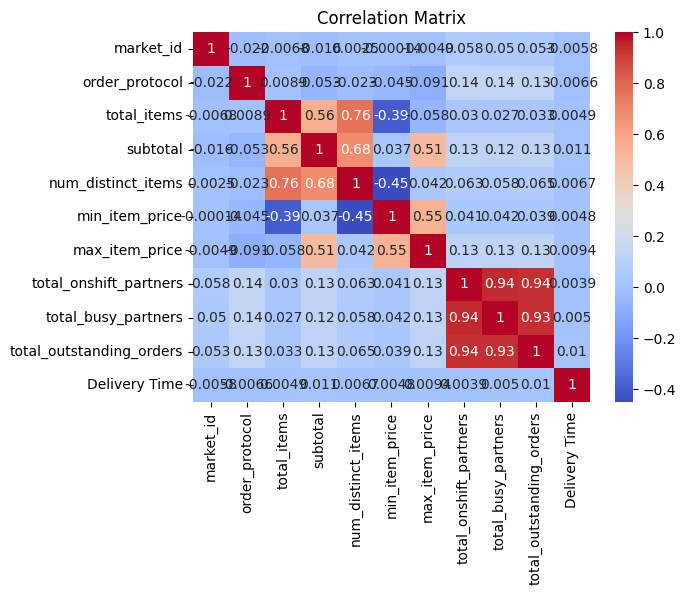

subtotal                    0.011200
total_outstanding_orders    0.010036
max_item_price              0.009409
num_distinct_items          0.006741
total_busy_partners         0.004977
total_items                 0.004905
min_item_price              0.004762
total_onshift_partners      0.003855
market_id                  -0.005784
order_protocol             -0.006602
Name: Delivery Time, dtype: float64


<ipython-input-29-2d27d6f87a07>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = data.corr()['Delivery Time'].drop('Delivery Time')


In [29]:
corr_matrix = data.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

corr_values = data.corr()['Delivery Time'].drop('Delivery Time')

print(corr_values.sort_values(ascending=False))

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['store_primary_category'] = le.fit_transform(data['store_primary_category'])


In [31]:
data.drop(columns=["created_at","actual_delivery_time",'store_id'], inplace=True)

In [32]:
data

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Delivery Time
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333
1,2.0,47,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667
2,3.0,4,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333
3,3.0,4,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000
4,3.0,4,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333
...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,65.116667
197424,1.0,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,56.383333
197425,1.0,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,50.133333
197426,1.0,59,1.0,1,1175,1,535,535,7.0,7.0,12.0,65.116667


In [ ]:
#fig, axs = plt.subplots(1,2, figsize = (12,7))
#sns.boxplot(x='delivery_time', data = data,ax=axs[0])
#sns.scatterplot(x='delivery_time',y='subtotal',data=data,ax=axs[1])

In [33]:
X = data.drop(['Delivery Time'], axis=1) # Features
y = data['Delivery Time'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138194 entries, 20250 to 121962
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 138194 non-null  float64
 1   store_primary_category    138194 non-null  int64  
 2   order_protocol            138194 non-null  float64
 3   total_items               138194 non-null  int64  
 4   subtotal                  138194 non-null  int64  
 5   num_distinct_items        138194 non-null  int64  
 6   min_item_price            138194 non-null  int64  
 7   max_item_price            138194 non-null  int64  
 8   total_onshift_partners    138194 non-null  float64
 9   total_busy_partners       138194 non-null  float64
 10  total_outstanding_orders  138194 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 12.7 MB


In [35]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
x_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
## Create a simple neural network model
model = Sequential([
    Dense(64, activation='relu', kernel_initializer='normal', input_shape=(X_train.shape[1],)),
    Dense(516, activation='relu'),
    Dense(1024,activation='relu'),
    Dense(256,activation='relu'),
    Dense(1,activation='linear') # Since it's a regression task, used 1 output neuron
])

In [37]:

model.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

##Training the neural network for required amount of epochs
history=model.fit(X_train,y_train,epochs=90,batch_size=512)

Epoch 1/90
309/309 [==============================] - 21s 64ms/step - loss: 128165.5391 - mse: 128165.5391 - mae: 16.3300
Epoch 2/90
309/309 [==============================] - 23s 74ms/step - loss: 128064.9531 - mse: 128064.9531 - mae: 14.7352
Epoch 3/90
309/309 [==============================] - 20s 65ms/step - loss: 128061.0781 - mse: 128061.0781 - mae: 14.7174
Epoch 4/90
309/309 [==============================] - 21s 66ms/step - loss: 128054.5391 - mse: 128054.5391 - mae: 14.6658
Epoch 5/90
309/309 [==============================] - 21s 68ms/step - loss: 128060.8672 - mse: 128060.8672 - mae: 14.6903
Epoch 6/90
309/309 [==============================] - 21s 67ms/step - loss: 128049.2109 - mse: 128049.2109 - mae: 14.4794
Epoch 7/90
309/309 [==============================] - 22s 71ms/step - loss: 128057.5781 - mse: 128057.5781 - mae: 14.7599
Epoch 8/90
309/309 [==============================] - 20s 65ms/step - loss: 128041.6250 - mse: 128041.6250 - mae: 14.3833
Epoch 9/90
309/309 [====

In [38]:
z= model.predict(X_test)


1234/1234 [==============================] - 6s 5ms/step


In [41]:
mse=mean_squared_error(y_test,z)
rmse=mse**.5
print("Mean Squared Error : ",mse)
print("Root Mean Squared Error : ",rmse)
mae=mean_absolute_error(y_test,z)
print("Mean Absolute Error : ",mae)
r2_score_RF = r2_score(y_test,z)
print("r2_score : ",r2_score_RF)

Mean Squared Error :  1322.9630640371597
Root Mean Squared Error :  36.37255921759094
Mean Absolute Error :  12.624206863528272
r2_score :  0.02097406156374071


---------------------------------------------------------------------------